# Basic library import and File managing

In [2]:
import pandas as pd
import sqlite3
import numpy as np

## Assigning relative paths of datasets to variables for easy access

In [43]:
bollywood_movies = './Datasets/movies_data/bollywood_movies.sqlite'
Indian_movies = './Datasets/movies_data/indian_movies.csv'
Tollywood_movies= './Datasets/movies_data/tollywood_movies.xlsx'
print(bollywood_movies)
print(Tollywood_movies)
print(Indian_movies)

./Datasets/movies_data/bollywood_movies.sqlite
./Datasets/movies_data/tollywood_movies.xlsx
./Datasets/movies_data/indian_movies.csv


# Dealing with first Dataset 'bollywood_movies.sqlite'

## EDA

In [45]:
conn = sqlite3.connect(bollywood_movies)

In [46]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

     name
0  Movies


In [47]:
bollywood_df = pd.read_sql_query("SELECT * FROM movies;", conn)
conn.close()

In [48]:
bollywood_df.head()

,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,0,MOV001,Lagaan,Ashutosh Gowariker,None,2001,NaN,100.0,8.1,224,Aamir Khan,Gracy Singh,Hindi,Aamir Khan Productions
1,1,MOV002,Kabhi Khushi Kabhie Gham...,Karan Johar,Family Drama,2001,50.0,100.0,7.9,210,Shah Rukh Khan,Kajol,Hindi,Dharma Productions
2,2,MOV003,M.S. Dhoni: The Untold Story,Neeraj Pandey,Biographical Sports Drama,2016,NaN,215.0,7.9,184,Sushant Singh Rajput,Kiara Advani,Hindi,Fox Star Studios
3,3,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2017,250.0,1810.0,8.2,171,Prabhas,Anushka Shetty,Telugu,Arka Media Works
4,4,MOV005,Chennai Express,Rohit Shetty,Action Comedy,2013,NaN,423.0,6.4,141,Shah Rukh Khan,Deepika Padukone,Hindi,Red Chillies Entertainment


In [51]:
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               55 non-null     int64  
 1   MovieID             55 non-null     object 
 2   Title               55 non-null     object 
 3   Director            55 non-null     object 
 4   Genre               54 non-null     object 
 5   ReleaseYear         55 non-null     int64  
 6   Budget (Crores)     43 non-null     float64
 7   BoxOffice (Crores)  46 non-null     float64
 8   Rating              55 non-null     float64
 9   Duration (minutes)  55 non-null     int64  
 10  LeadActor           55 non-null     object 
 11  LeadActress         55 non-null     object 
 12  Language            55 non-null     object 
 13  ProductionCompany   55 non-null     object 
dtypes: float64(3), int64(3), object(8)
memory usage: 6.1+ KB


In [66]:
bollywood_df.describe()

,index,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes)
count,55.00000,55.000000,43.000000,46.000000,55.000000,55.000000
mean,27.00000,2015.200000,91.511628,374.260870,7.260000,158.454545
std,16.02082,6.198566,109.633670,466.566296,0.883721,21.947596
min,0.00000,1995.000000,1.000000,5.000000,4.400000,118.000000
25%,13.50000,2014.500000,20.000000,71.500000,6.800000,145.000000
50%,27.00000,2018.000000,50.000000,250.000000,7.400000,158.000000
75%,40.50000,2019.000000,135.000000,457.500000,7.900000,168.000000
max,54.00000,2020.000000,550.000000,2140.000000,8.400000,224.000000


In [192]:
bollywood_df.isnull().sum()

MovieID               0
Title                 0
Director              0
Genre                 0
ReleaseYear           0
Budget (Crores)       0
BoxOffice (Crores)    0
Rating                0
Duration (minutes)    0
LeadActor             0
LeadActress           0
Language              0
ProductionCompany     0
Industry              0
dtype: int64

In [71]:
bollywood_df.duplicated().sum()

np.int64(0)

array([[<Axes: title={'center': 'index'}>,
        <Axes: title={'center': 'ReleaseYear'}>],
       [<Axes: title={'center': 'Budget (Crores)'}>,
        <Axes: title={'center': 'BoxOffice (Crores)'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Duration (minutes)'}>]], dtype=object)

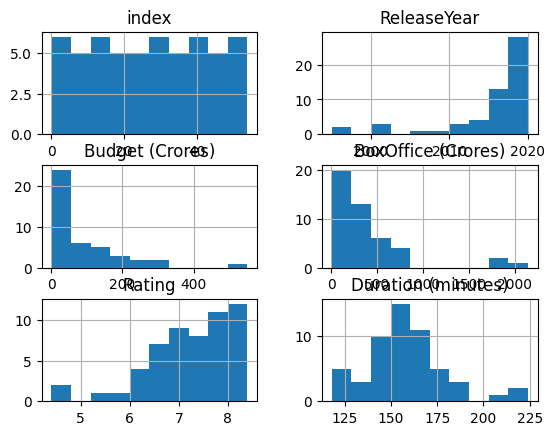

In [68]:
bollywood_df.hist()

In [62]:
import matplotlib.pyplot as plt

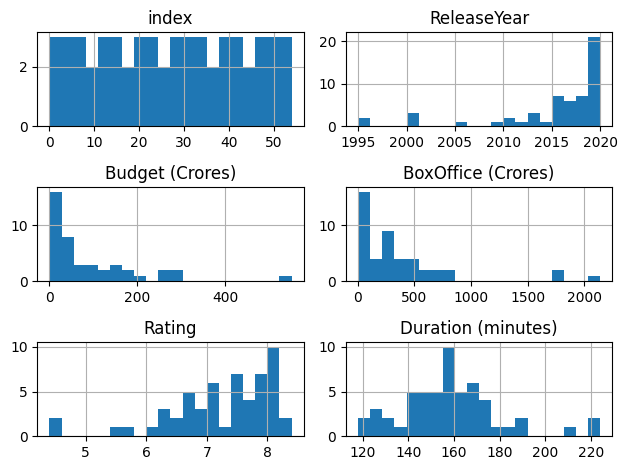

In [64]:
bollywood_df.hist(bins=20)
plt.tight_layout()

## Data Cleaning

### Fill missing 'Genre' with the mode

In [78]:
bollywood_df['Genre'].fillna(bollywood_df['Genre'].mode()[0], inplace=True)

### Fill missing 'Budget (Crores)' with the median value

In [88]:
bollywood_df['Budget (Crores)'] = bollywood_df['Budget (Crores)'].fillna(bollywood_df['Budget (Crores)'].median())

### Fill missing 'BoxOffice (Crores)' with the median value

In [91]:
bollywood_df['BoxOffice (Crores)'] = bollywood_df['BoxOffice (Crores)'].fillna(bollywood_df['BoxOffice (Crores)'].median())

In [193]:
bollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MovieID             55 non-null     object 
 1   Title               55 non-null     object 
 2   Director            55 non-null     object 
 3   Genre               55 non-null     object 
 4   ReleaseYear         55 non-null     int64  
 5   Budget (Crores)     55 non-null     float64
 6   BoxOffice (Crores)  55 non-null     float64
 7   Rating              55 non-null     float64
 8   Duration (minutes)  55 non-null     int64  
 9   LeadActor           55 non-null     object 
 10  LeadActress         55 non-null     object 
 11  Language            55 non-null     object 
 12  ProductionCompany   55 non-null     object 
 13  Industry            55 non-null     object 
dtypes: float64(3), int64(2), object(9)
memory usage: 6.1+ KB


In [97]:
bollywood_df.head()

,index,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,0,MOV001,Lagaan,Ashutosh Gowariker,Action Thriller,2001,50.0,100.0,8.1,224,Aamir Khan,Gracy Singh,Hindi,Aamir Khan Productions
1,1,MOV002,Kabhi Khushi Kabhie Gham...,Karan Johar,Family Drama,2001,50.0,100.0,7.9,210,Shah Rukh Khan,Kajol,Hindi,Dharma Productions
2,2,MOV003,M.S. Dhoni: The Untold Story,Neeraj Pandey,Biographical Sports Drama,2016,50.0,215.0,7.9,184,Sushant Singh Rajput,Kiara Advani,Hindi,Fox Star Studios
3,3,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2017,250.0,1810.0,8.2,171,Prabhas,Anushka Shetty,Telugu,Arka Media Works
4,4,MOV005,Chennai Express,Rohit Shetty,Action Comedy,2013,50.0,423.0,6.4,141,Shah Rukh Khan,Deepika Padukone,Hindi,Red Chillies Entertainment


In [155]:
bollywood_df.to_csv('./Datasets/movies_data_cleaned/cleaned_bollywood_movies.csv', index=False)

---

# Dealing with Second Dataset 'indian_movies.csv'

## EDA

In [101]:
indian_movies_df = pd.read_csv(Indian_movies)

In [102]:
indian_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          18 non-null     int64  
 1   MovieID             18 non-null     object 
 2   Title               18 non-null     object 
 3   Director            18 non-null     object 
 4   Genre               18 non-null     object 
 5   ReleaseYear         17 non-null     float64
 6   Budget (Crores)     10 non-null     float64
 7   BoxOffice (Crores)  10 non-null     float64
 8   Rating              17 non-null     float64
 9   Duration (minutes)  17 non-null     float64
 10  LeadActor           18 non-null     object 
 11  LeadActress         18 non-null     object 
 12  Language            18 non-null     object 
 13  ProductionCompany   18 non-null     object 
dtypes: float64(5), int64(1), object(8)
memory usage: 2.1+ KB


In [105]:
indian_movies_df.head()

,Unnamed: 0,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,7,MOV008,Sarkar (Tamil),A. R. Murugadoss,Action Thriller,2005.0,NaN,NaN,7.5,173.0,Vijay,Keerthy Suresh,Tamil,Kalaignar TV
1,9,MOV010,2.0 (Tamil),S. Shankar,Science Fiction Action,2018.0,550.0,800.0,6.9,147.0,Rajinikanth,Amy Jackson,Tamil,Lyca Productions
2,21,MOV022,K.G.F: Chapter 1,Prashanth Neel,Action Drama,2018.0,50.0,250.0,7.9,156.0,Yash,Srinidhi Shetty,Kannada,Hombale Films
3,23,MOV024,Avengers: Endgame (Dubbed),"Anthony Russo, Joseph Russo",Superhero,2019.0,NaN,NaN,8.4,181.0,Robert Downey Jr.,Scarlett Johansson,"English (Dubbed in Telugu, Kannada, Hindi)",Marvel Studios
4,25,MOV026,Pailwaan,S. Krishna,Sports Action,2019.0,30.0,55.0,6.8,NaN,Sudeep,Aakanksha Singh,Kannada,RRR Motion Pictures


In [195]:
indian_movies_df.describe()

,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes)
count,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2018.111111,67.833333,126.666667,7.066667,152.833333
std,3.410863,137.440147,203.252957,0.980996,16.511137
min,2005.000000,1.000000,5.000000,4.400000,118.000000
25%,2018.250000,21.250000,41.875000,6.800000,144.250000
50%,2019.000000,25.000000,47.500000,7.100000,156.000000
75%,2019.000000,28.750000,53.125000,7.900000,163.500000
max,2020.000000,550.000000,800.000000,8.400000,181.000000


In [196]:
indian_movies_df.isnull().sum()

MovieID               0
Title                 0
Director              0
Genre                 0
ReleaseYear           0
Budget (Crores)       0
BoxOffice (Crores)    0
Rating                0
Duration (minutes)    0
LeadActor             0
LeadActress           0
Language              0
ProductionCompany     0
Industry              0
dtype: int64

In [201]:
indian_movies_df.duplicated().sum()

np.int64(0)

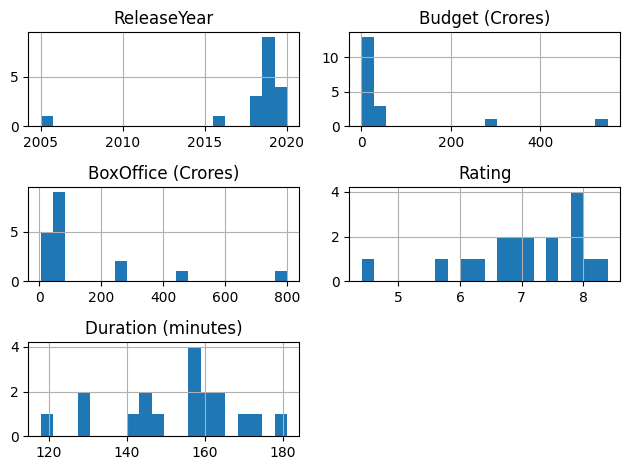

In [202]:
indian_movies_df.hist(bins=20)
plt.tight_layout()

## Data Cleaning

### 1. Drop the 'Unnamed: 0' column

In [106]:
indian_movies_df.drop(columns=['Unnamed: 0'], inplace=True)

### Fill missing 'ReleaseYear' with the median (since it's a year, it makes sense to use median)

In [109]:
indian_movies_df['ReleaseYear'] = indian_movies_df['ReleaseYear'].fillna(indian_movies_df['ReleaseYear'].median())

### Fill missing 'Rating' with the median value

In [111]:
indian_movies_df['Rating'] = indian_movies_df['Rating'].fillna(indian_movies_df['Rating'].median())

### Fill missing 'Duration (minutes)' with the median value

In [113]:
indian_movies_df['Duration (minutes)'] = indian_movies_df['Duration (minutes)'].fillna(indian_movies_df['Duration (minutes)'].median())

### Fill missing 'Budget (Crores)' with the median value


In [116]:
indian_movies_df['Budget (Crores)'] = indian_movies_df['Budget (Crores)'].fillna(indian_movies_df['Budget (Crores)'].median())

### Fill missing 'BoxOffice (Crores)' with the median value


In [118]:
indian_movies_df['BoxOffice (Crores)'] = indian_movies_df['BoxOffice (Crores)'].fillna(indian_movies_df['BoxOffice (Crores)'].median())

### 3. Remove duplicates (if any)


In [120]:
indian_movies_df.drop_duplicates(inplace=True)

In [123]:
indian_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MovieID             18 non-null     object 
 1   Title               18 non-null     object 
 2   Director            18 non-null     object 
 3   Genre               18 non-null     object 
 4   ReleaseYear         18 non-null     float64
 5   Budget (Crores)     18 non-null     float64
 6   BoxOffice (Crores)  18 non-null     float64
 7   Rating              18 non-null     float64
 8   Duration (minutes)  18 non-null     float64
 9   LeadActor           18 non-null     object 
 10  LeadActress         18 non-null     object 
 11  Language            18 non-null     object 
 12  ProductionCompany   18 non-null     object 
dtypes: float64(5), object(8)
memory usage: 2.0+ KB


### 6. Reset index after cleaning

In [124]:
indian_movies_df.reset_index(drop=True, inplace=True)

In [127]:
indian_movies_df.head()

,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,MOV008,Sarkar (Tamil),A. R. Murugadoss,Action Thriller,2005.0,25.0,47.5,7.5,173.0,Vijay,Keerthy Suresh,Tamil,Kalaignar TV
1,MOV010,2.0 (Tamil),S. Shankar,Science Fiction Action,2018.0,550.0,800.0,6.9,147.0,Rajinikanth,Amy Jackson,Tamil,Lyca Productions
2,MOV022,K.G.F: Chapter 1,Prashanth Neel,Action Drama,2018.0,50.0,250.0,7.9,156.0,Yash,Srinidhi Shetty,Kannada,Hombale Films
3,MOV024,Avengers: Endgame (Dubbed),"Anthony Russo, Joseph Russo",Superhero,2019.0,25.0,47.5,8.4,181.0,Robert Downey Jr.,Scarlett Johansson,"English (Dubbed in Telugu, Kannada, Hindi)",Marvel Studios
4,MOV026,Pailwaan,S. Krishna,Sports Action,2019.0,30.0,55.0,6.8,156.0,Sudeep,Aakanksha Singh,Kannada,RRR Motion Pictures


In [150]:
indian_movies_df.to_csv('./Datasets/movies_data_cleaned/cleaned_indian_movies.csv', index=False)

---

# Dealing with Second Dataset 'tollywood_movies.xlsx'

In [131]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.0 MB/s eta 0:00:00 MB/s eta 0:00:01


In [132]:
tollywood_df = pd.read_excel(Tollywood_movies)

## EDA

In [133]:
tollywood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10 non-null     int64  
 1   MovieID             10 non-null     object 
 2   Title               10 non-null     object 
 3   Director            10 non-null     object 
 4   Genre               10 non-null     object 
 5   ReleaseYear         8 non-null      float64
 6   Budget (Crores)     10 non-null     int64  
 7   BoxOffice (Crores)  10 non-null     int64  
 8   Rating              9 non-null      float64
 9   Duration (minutes)  9 non-null      float64
 10  LeadActor           10 non-null     object 
 11  LeadActress         10 non-null     object 
 12  Language            7 non-null      object 
 13  ProductionCompany   9 non-null      object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.2+ KB


In [207]:
tollywood_df.describe()

,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes)
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,2017.900000,120.000000,570.500000,7.690000,162.600000
std,1.712698,101.406772,691.453582,0.472464,9.570789
min,2015.000000,10.000000,35.000000,7.100000,145.000000
25%,2017.250000,20.000000,70.000000,7.175000,159.000000
50%,2018.500000,127.500000,262.500000,7.800000,167.000000
75%,2019.000000,195.000000,650.000000,8.100000,169.750000
max,2020.000000,250.000000,1810.000000,8.200000,171.000000


In [206]:
tollywood_df.isnull().sum()

MovieID               0
Title                 0
Director              0
Genre                 0
ReleaseYear           0
Budget (Crores)       0
BoxOffice (Crores)    0
Rating                0
Duration (minutes)    0
LeadActor             0
LeadActress           0
Language              0
ProductionCompany     0
Industry              0
dtype: int64

In [205]:
tollywood_df.duplicated().sum()

np.int64(0)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


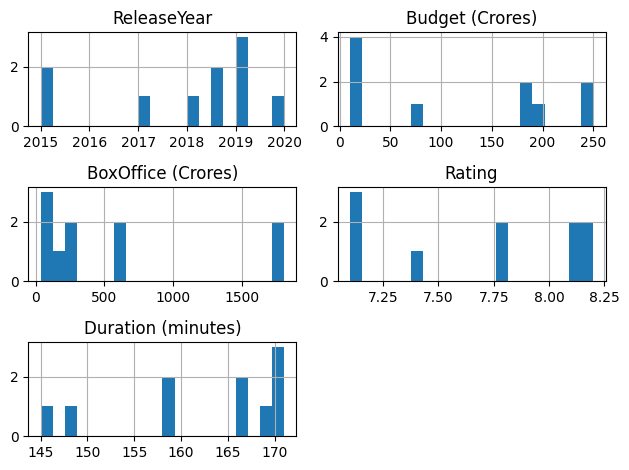

In [204]:
tollywood_df.hist(bins=20)
plt.tight_layout()

## Data Cleaning

In [134]:
tollywood_df.drop(columns=['Unnamed: 0'], inplace=True)

### Replacing Missing Values with Median of that specific column

In [135]:
tollywood_df['ReleaseYear'] = tollywood_df['ReleaseYear'].fillna(tollywood_df['ReleaseYear'].median())
tollywood_df['Rating'] = tollywood_df['Rating'].fillna(tollywood_df['Rating'].median())
tollywood_df['Duration (minutes)'] = tollywood_df['Duration (minutes)'].fillna(tollywood_df['Duration (minutes)'].median())

### Since it's Tollywood filling the missing values in the Language field with "Telugu"

In [137]:
tollywood_df['Language'] = tollywood_df['Language'].fillna('Telugu')

### Filling missing ProductionCompany vules with Unknown

In [143]:
tollywood_df['ProductionCompany'] = tollywood_df['ProductionCompany'].fillna('Unknown')

In [145]:
tollywood_df.reset_index(drop=True, inplace=True)

In [149]:
tollywood_df.head()

,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany
0,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2018.5,250,1810,8.2,171.0,Prabhas,Anushka Shetty,Telugu,Arka Media Works
1,MOV021,Bahubali: The Beginning,S. S. Rajamouli,Epic Fantasy Action,2015.0,180,650,8.1,159.0,Prabhas,Tamannaah,Telugu,Unknown
2,MOV023,Sye Raa Narasimha Reddy,Surender Reddy,Historical Action,2019.0,200,265,7.1,167.0,Chiranjeevi,Nayanthara,Telugu,Konidela Production Company
3,MOV025,Jersey,Gowtam Tinnanuri,Sports Drama,2019.0,20,45,7.8,167.0,Nani,Shraddha Srinath,Telugu,Sithara Entertainments
4,MOV027,Geetha Govindam,Parasuram,Romantic Comedy,2018.0,10,130,7.8,148.0,Vijay Deverakonda,Rashmika Mandanna,Telugu,GA2 Pictures


In [158]:
tollywood_df.to_csv('./Datasets/movies_data_cleaned/cleaned_tollywood_movies.csv', index=False)

# Combining All Three Datasets

## Separate column naming Industry added to analyse according to the specific industry after combining all three datasets

In [180]:
bollywood_df['Industry'] = 'Bollywood'
indian_movies_df['Industry'] = 'Indian Mixed'
tollywood_df['Industry'] = 'Tollywood'

In [181]:
if 'index' in bollywood_df.columns:
    bollywood_df.drop(columns=['index'], inplace=True)

In [182]:
combined_df = pd.concat([bollywood_df, indian_movies_df, tollywood_df], ignore_index=True)

In [183]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MovieID             83 non-null     object 
 1   Title               83 non-null     object 
 2   Director            83 non-null     object 
 3   Genre               83 non-null     object 
 4   ReleaseYear         83 non-null     float64
 5   Budget (Crores)     83 non-null     float64
 6   BoxOffice (Crores)  83 non-null     float64
 7   Rating              83 non-null     float64
 8   Duration (minutes)  83 non-null     float64
 9   LeadActor           83 non-null     object 
 10  LeadActress         83 non-null     object 
 11  Language            83 non-null     object 
 12  ProductionCompany   83 non-null     object 
 13  Industry            83 non-null     object 
dtypes: float64(5), object(9)
memory usage: 9.2+ KB


In [188]:
combined_df.head()

,MovieID,Title,Director,Genre,ReleaseYear,Budget (Crores),BoxOffice (Crores),Rating,Duration (minutes),LeadActor,LeadActress,Language,ProductionCompany,Industry
0,MOV001,Lagaan,Ashutosh Gowariker,Action Thriller,2001.0,50.0,100.0,8.1,224.0,Aamir Khan,Gracy Singh,Hindi,Aamir Khan Productions,Bollywood
1,MOV002,Kabhi Khushi Kabhie Gham...,Karan Johar,Family Drama,2001.0,50.0,100.0,7.9,210.0,Shah Rukh Khan,Kajol,Hindi,Dharma Productions,Bollywood
2,MOV003,M.S. Dhoni: The Untold Story,Neeraj Pandey,Biographical Sports Drama,2016.0,50.0,215.0,7.9,184.0,Sushant Singh Rajput,Kiara Advani,Hindi,Fox Star Studios,Bollywood
3,MOV004,Baahubali 2: The Conclusion,S. S. Rajamouli,Epic Fantasy Action,2017.0,250.0,1810.0,8.2,171.0,Prabhas,Anushka Shetty,Telugu,Arka Media Works,Bollywood
4,MOV005,Chennai Express,Rohit Shetty,Action Comedy,2013.0,50.0,423.0,6.4,141.0,Shah Rukh Khan,Deepika Padukone,Hindi,Red Chillies Entertainment,Bollywood


In [189]:
combined_df.to_csv('./Datasets/movies_data_cleaned/combined_dataset.csv', index=False)